<a href="https://colab.research.google.com/github/ktnspr/py4ac/blob/main/05_python_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope (weight): 1.21
Intercept (bias): 110.37


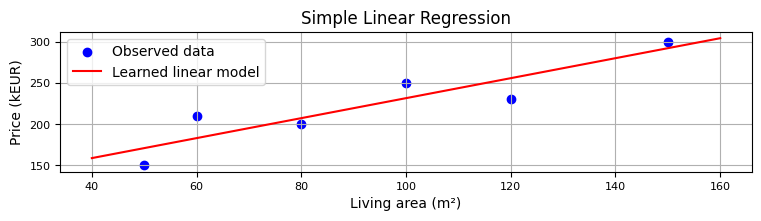

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Figure size and font size settings
full_width = 398.3386 / 72.27 * 1.4
plan_factor = 1.0
pw = plan_factor * full_width
fs = 10

# Example data: living area (m²) and house price (in 1000 Euros)
df = pd.DataFrame({
    'living_area': [50, 60, 80, 100, 120, 150],
    'price': [150, 210, 200, 250, 230, 300]
})

# Create and train the linear regression model
model = LinearRegression()
model.fit(df[['living_area']], df['price'])

# Generate new values for plotting the regression line
X_new = pd.DataFrame({'living_area': np.linspace(40, 160, 300)})
y_new = model.predict(X_new)

# Visualization with explicit figure size and font sizes
plt.figure(figsize=(pw, 0.3 * pw))
plt.scatter(df['living_area'], df['price'], color='blue', label='Observed data')
plt.plot(X_new['living_area'], y_new, color='red', label='Learned linear model')
plt.xlabel('Living area (m²)', fontsize=fs)
plt.ylabel('Price (kEUR)', fontsize=fs)
plt.title('Simple Linear Regression', fontsize=fs + 2)
plt.legend(fontsize=fs)
plt.xticks(fontsize=fs - 2)
plt.yticks(fontsize=fs - 2)
plt.grid(True)
plt.tight_layout()

# Output model parameters
print(f"Slope (weight): {model.coef_[0]:.2f}")
print(f"Intercept (bias): {model.intercept_:.2f}")

# Layout and save the figure
fig = plt.gcf()
fig.tight_layout()


In [2]:
np.array([50, 60, 80, 100, 120, 150]).reshape(-1,1)

array([[ 50],
       [ 60],
       [ 80],
       [100],
       [120],
       [150]])

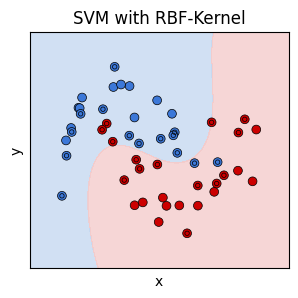

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

# Figure size and font size
full_width = 159.333 / 72.27 * 1.4
plan_factor = 1.0
pw = plan_factor * full_width
fs = 10

from sklearn.datasets import make_moons

# Generate data – overlapping half moons, not linearly separable
X_np, y_np = make_moons(n_samples=50, noise=0.25, random_state=44)

# Convert to Pandas DataFrame
df = pd.DataFrame(X_np, columns=['x1', 'x2'])
df['label'] = y_np

# Train SVM with RBF kernel
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(df[['x1', 'x2']], df['label'])

# Define color maps
light_colors = ListedColormap(['#c6d9f1', '#f4cccc'])  # light blue / light red
point_colors = ListedColormap(['#3c78d8', '#cc0000'])  # darker blue / red

# Create meshgrid for decision surface
x_min, x_max = df['x1'].min() - 0.5, df['x1'].max() + 0.5
y_min, y_max = df['x2'].min() - 0.5, df['x2'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1', 'x2'])
Z = model.predict(grid_points).reshape(xx.shape)

# Plot
plt.figure(figsize=(pw, pw))
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

# Plot data points
plt.scatter(df['x1'], df['x2'], c=df['label'], cmap=point_colors,
            edgecolors='k', s=40, linewidth=0.5)

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=10, facecolors='none', edgecolors='k', linewidths=0.5)

# Axes and labels
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'y', fontsize=fs)
plt.xticks([])
plt.yticks([])
plt.title("SVM with RBF-Kernel", fontsize=fs + 2)

# Layout and save
fig = plt.gcf()
fig.tight_layout()

In [4]:
test_point = pd.DataFrame([[0.25, 0.75]], columns=['x1', 'x2'])
probs = model.predict_proba(test_point)
print(f"Class probabilities for point (0.25, 0.75): {probs}")

Class probabilities for point (0.25, 0.75): [[0.90716134 0.09283866]]


In [5]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB

# Define contingency-based data: M / R / L / P(M, R, L)
data = [
    [1, 1, 1, 1/3 * 1/2   * 0.3],
    [1, 0, 1, 1/3 * 1/2   * 0.3],
    [0, 1, 1, 2/3 * 1/2   * 0.3],
    [0, 0, 1, 2/3 * 1/2   * 0.3],
    [1, 1, 0, 4/7 * 3/14  * 0.7],
    [1, 0, 0, 4/7 * 11/14 * 0.7],
    [0, 1, 0, 3/7 * 3/14  * 0.7],
    [0, 0, 0, 3/7 * 11/14 * 0.7],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["M", "R", "L", "prob"])

# Normalize and scale to synthetic sample counts
df["n_samples"] = ((df["prob"] / df["prob"].sum()) * 100000).round()

# Create synthetic dataset by repeating rows
samples = []
for _, row in df.iterrows():
    samples.extend([[int(row["M"]), int(row["R"]), int(row["L"])]] * int(row["n_samples"]))

df_samples = pd.DataFrame(samples, columns=["M", "R", "L"])

# Train Naive Bayes classifier
model = CategoricalNB()
X = df_samples[["M", "R"]]
y = df_samples["L"]
model.fit(X, y)

# Predict probabilities for all combinations
combinations = pd.DataFrame([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
], columns=["M", "R"])

probs = model.predict_proba(combinations)
result = combinations.copy()
result[["P(L=0)", "P(L=1)"]] = probs

# print result to 3 digits
result = result.round(3)
print(result)


   M  R  P(L=0)  P(L=1)
0  1  1   0.632   0.368
1  1  0   0.863   0.137
2  0  1   0.391   0.609
3  0  0   0.702   0.298


In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# 2. Define train and test sets
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# 3. Binarize the pixel values (threshold at 128)
X_train_binary = (X_train > 128).astype(int)
X_test_binary = (X_test > 128).astype(int)

# 4. Create a Naive Bayes classifier for binary data
model = BernoulliNB()

# 5. Train the model
model.fit(X_train_binary, y_train)

# 6. Make predictions on the test data
y_pred = model.predict(X_test_binary)

# 7. Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes classifier on MNIST with binary pixels: {accuracy * 100:.2f}%") # 84.33%

Accuracy of the Naive Bayes classifier on MNIST with binary pixels: 84.33%


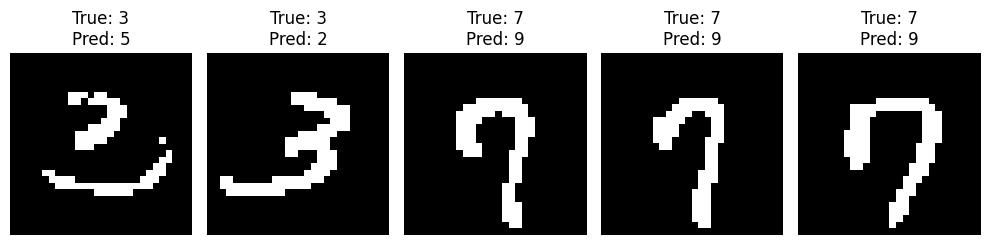

In [8]:
predicted_labels = model.predict(X_test_binary)
misclassified_indices = np.where(predicted_labels != y_test)[0]
random_misclassified_indices = np.random.choice(misclassified_indices, size=5, replace=False)


plt.figure(figsize=(10, 5))
for i, index in enumerate(random_misclassified_indices):
    plt.subplot(1, 5, i + 1)
    plt.axis("off")

    img = X_test_binary.iloc[index].to_numpy().reshape(28, 28) \
          if hasattr(X_test_binary, "iloc") else X_test_binary[index].reshape(28, 28)

    true_label = y_test.iloc[index] if hasattr(y_test, "iloc") else y_test[index]
    pred_label = predicted_labels[index]

    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}")

plt.tight_layout()

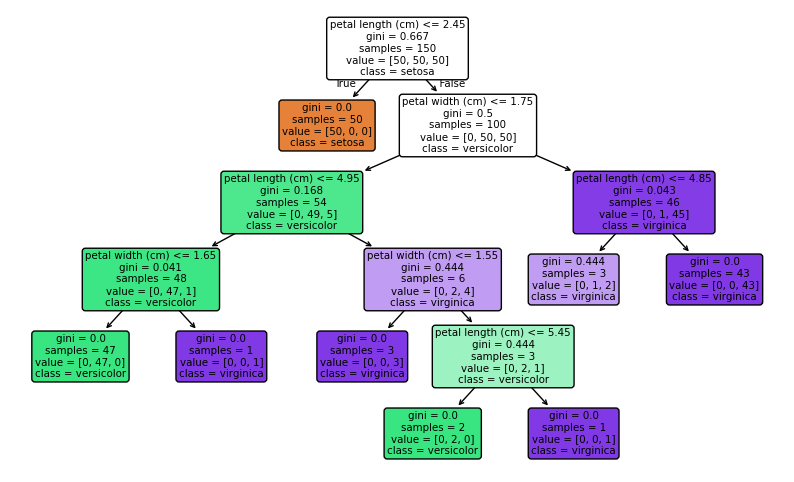

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
target_names = iris.target_names.tolist()

# Use only petal length and petal width for visualization
selected_features = ['petal length (cm)', 'petal width (cm)']

# Train a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X[selected_features], y)

# Visualize the decision tree using matplotlib
plt.figure(figsize=(10, 6))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=selected_features,
    class_names=target_names,
    rounded=True
)
plt.show()


In [10]:
# prediction example using pandas
import pandas as pd
# Create a DataFrame for a new sample
new_sample = pd.DataFrame({
    'petal length (cm)': [1.5],
    'petal width (cm)': [0.2]
})
# Predict the class for the new sample
predicted_class = clf.predict(new_sample)
print(f"Predicted class for the new sample: {target_names[predicted_class[0]]}")


Predicted class for the new sample: setosa


In [11]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# 1. Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)  # Normalize and convert labels to integers

# 2. Define train and test sets
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# 3. Define a simple feedforward neural network
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 units
    activation='relu',
    solver='adam',
    max_iter=10,
    batch_size=256,
    verbose=True  # Set to False if you want a silent training process
)

# 4. Train the model and measure training time
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")

# 5. Evaluate model on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Iteration 1, loss = 0.40946870
Iteration 2, loss = 0.16238131
Iteration 3, loss = 0.11608064
Iteration 4, loss = 0.09135595
Iteration 5, loss = 0.07319258
Iteration 6, loss = 0.06172304
Iteration 7, loss = 0.05075161
Iteration 8, loss = 0.04232369
Iteration 9, loss = 0.03680775
Iteration 10, loss = 0.03060776
Training time: 41.57 seconds
Test accuracy: 0.9760


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
n_coefs = sum(coef.size for coef in model.coefs_)
n_intercepts = sum(intercept.size for intercept in model.intercepts_)
print(f"Number of coefficients    : {n_coefs}")
print(f"Number of intercepts      : {n_intercepts}")
print(f"Total number of parameters: {n_coefs + n_intercepts}")

Number of coefficients    : 109184
Number of intercepts      : 202
Total number of parameters: 109386


In [ ]:
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# Prüfen, ob Apple Silicon GPU verfügbar ist
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Apple Silicon GPU wird genutzt")
else:
    print("Apple Silicon GPU nicht verfügbar, es wird die CPU genutzt")

# Daten laden
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Daten vorverarbeiten
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255  # Hinzufügen einer Kanal-Dimension
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train, 10)  # One-Hot-Encoding der Labels
y_test = to_categorical(y_test, 10)

# Modell definieren
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

# Modell kompilieren
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

initial_weights = model.get_weights()

#for dev in ['/cpu:0', '/gpu:0']:
for dev in ['/gpu:0']:
    # Modell initialisieren
    model.set_weights(initial_weights)

    # Zeitmessung starten
    start_time = time.time()

    # Modell trainieren
    with tf.device(dev):
        model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

    # Zeitmessung beenden
    end_time = time.time()
    training_duration = end_time - start_time
    print(f"Training Duration on {dev}: {training_duration:.2f} seconds")

    # Modell evaluieren
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Apple Silicon GPU nicht verfügbar, es wird die CPU genutzt
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 213ms/step - accuracy: 0.7062 - loss: 0.9040 - val_accuracy: 0.9752 - val_loss: 0.0818
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.9628 - loss: 0.1254 - val_accuracy: 0.9822 - val_loss: 0.0599
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.9781 - loss: 0.0790 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.9827 - loss: 0.0595 - val_accuracy: 0.9876 - val_loss: 0.0417
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9854 - val_loss: 0.0540
Epoch 6/10
 93/188 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.9871 - loss: 0.0409

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


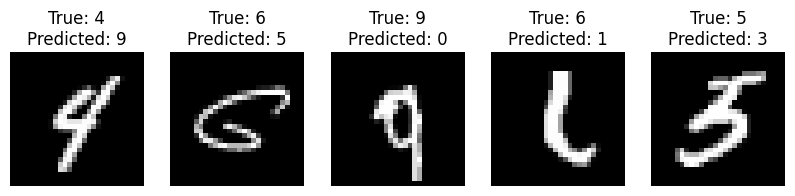

In [ ]:
# Beispiel für die falsch klassifizierten Bilder
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

misclassified_indices = np.where(predicted_labels != np.argmax(y_test, axis=1))[0]

# zufällige Auswahl von 5 falsch klassifizierten Bildern
random_misclassified_indices = np.random.choice(misclassified_indices, 5)

plt.figure(figsize=(10, 5))
for i, index in enumerate(random_misclassified_indices):
    plt.subplot(1, 5, i + 1)
    plt.axis("off")
    plt.imshow(x_test[index].reshape(28, 28), cmap="gray")
    plt.title(f"True: {np.argmax(y_test[index])}\nPredicted: {predicted_labels[index]}")

plt.show()